# Algoritmos de clustering

## ¿Qué es el clustering?

El análisis de clusters, el clustering o el agrupamiento, es un tipo de problema de autoaprendizaje no supervisado. El propósito de los algoritmos de clustering es encontrar o definir grupos de datos de caracteristicas similares. Estos grupos de características similares suelene ser bien definidas por el ojo humano cuando son representadas gráficamente y similaridad tiene relación con proximidad en el espacio de representación. Pero no podemos guiarnos por el ojo cuando los atributos son más de tres, cuando el sistema es multidimensional. Necesitamos algoritmos matemáticos que hagan la tarea de buscar estos grupos en el que los puntos son más similares entre si que frente a los demás.

La semana anterior se propuso el reto de hacer tu propio algoritmo de clustering basado en k-means. Veamos ahora cómo podemos hacer uso de este algoritmo de clustering, y de otros, con la librería Scikit-learn.

### El módulo "cluster" de Scikit-learn

Scikit-learn contiene un módulo con métodos de clustering llamado 'cluster'.

In [176]:
from sklearn import cluster

Veamos en qué consisten y cómo se usan algunos de los métodos de clustering de dicho módulo.

### K-means clustering

In [177]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

dataset, membership = datasets.make_blobs(n_samples=500, n_features=2,
                                          centers=3, cluster_std=1.0)

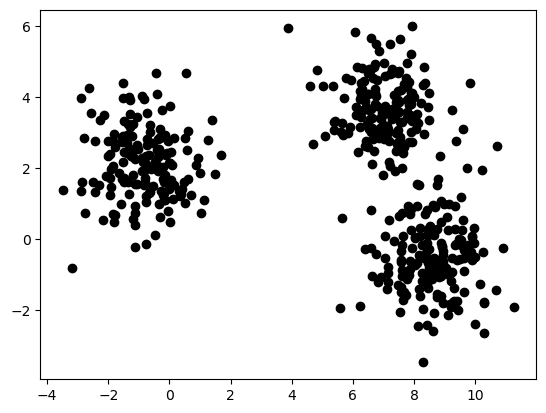

In [178]:
plt.scatter(dataset[:,0], dataset[:,1], color='k')
plt.show()

In [179]:
clustering = cluster.KMeans(n_clusters=3, init='random', n_init=25, max_iter=300, tol=1e-04, random_state=0)

In [180]:
membership = clustering.fit_predict(dataset)

Veamos los clusters obtenidos:

In [181]:
import seaborn as sns
import pandas as pd
import string

In [182]:
membership_letters = [string.ascii_uppercase[ii] for ii in membership]
df = pd.DataFrame({'Atributo 1':dataset[:,0], 'Atributo 2':dataset[:,1], 'Cluster':membership_letters})

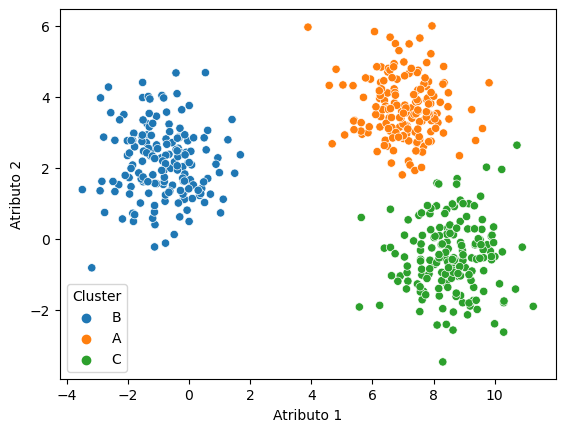

In [183]:
sns.scatterplot(data=df, x="Atributo 1", y="Atributo 2", hue="Cluster")
plt.show()

#### ¿Cómo podemos determinar el número apropiado de k-means?

In [184]:
# El momento de inercia de la distribución
# En este caso de los puntos de un cluster a su centro geométrico
# Como la suma de las distancias al centro al cuadrado

clustering.inertia_

937.0639332971894

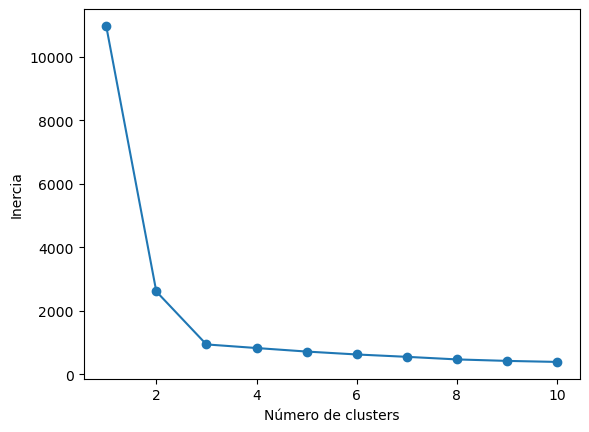

In [185]:
inercias = []
for ii in range(1, 11):
    clustering = cluster.KMeans(n_clusters=ii, init='random', n_init=25, max_iter=300, tol=1e-04, random_state=0)
    clustering.fit(dataset)
    inercias.append(clustering.inertia_)


plt.plot(range(1, 11), inercias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [199]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.7, min_samples=10).fit(dataset)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 42


In [201]:
membership_letters = [string.ascii_uppercase[ii] for ii in labels]
df = pd.DataFrame({'Atributo 1':dataset[:,0], 'Atributo 2':dataset[:,1], 'Cluster':membership_letters})

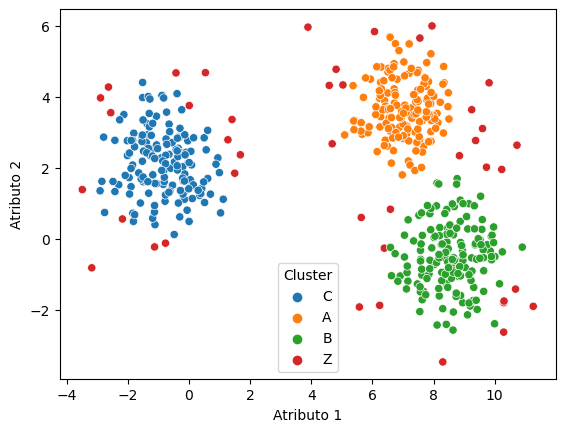

In [202]:
sns.scatterplot(data=df, x="Atributo 1", y="Atributo 2", hue="Cluster")
plt.show()

### Mean shift

In [44]:
from sklearn.datasets import load_digits

digits = load_digits()
dataset = digits.data

In [46]:
dataset.shape

(1797, 64)

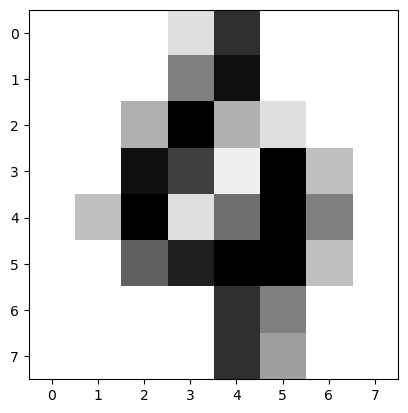

In [51]:
plt.imshow(dataset[100].reshape(8, 8), interpolation = 'nearest', cmap = plt.cm.binary)
plt.show()

In [159]:
clustering = cluster.AgglomerativeClustering(linkage="complete", n_clusters=10)

In [160]:
membership = clustering.fit_predict(dataset)

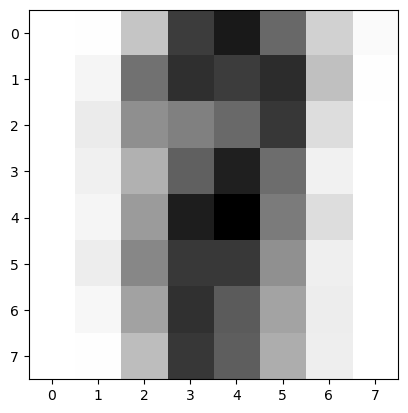

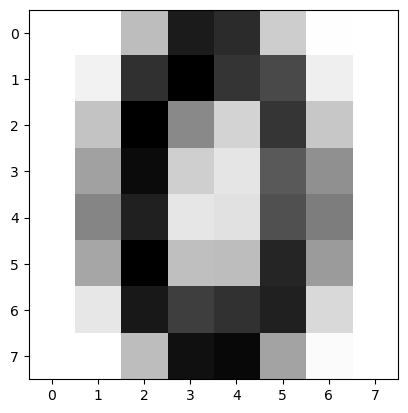

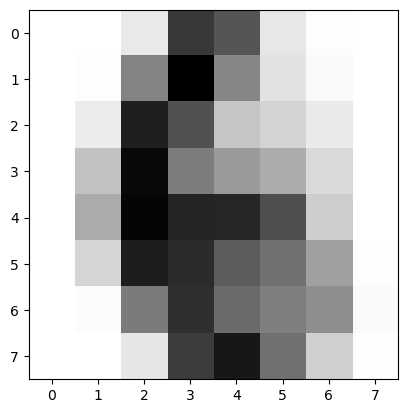

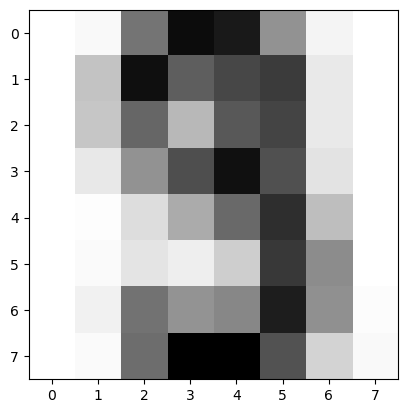

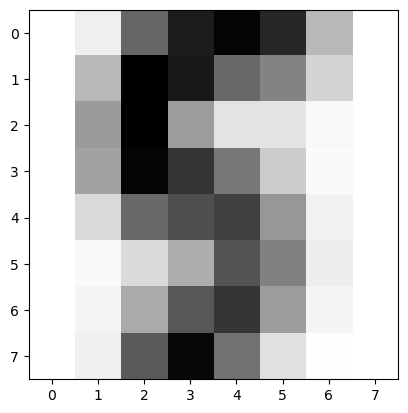

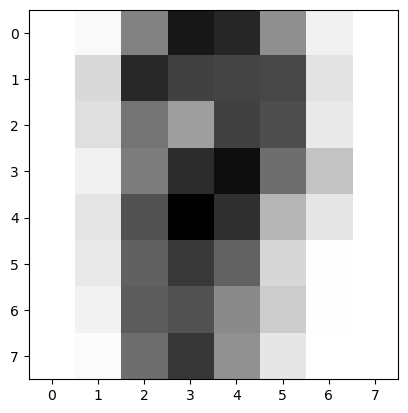

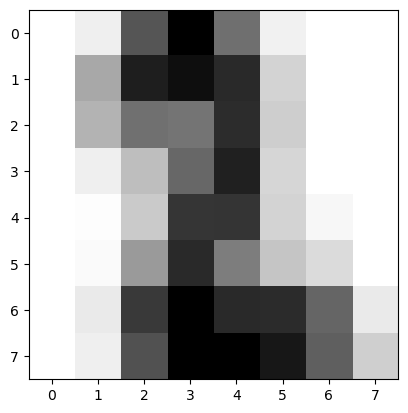

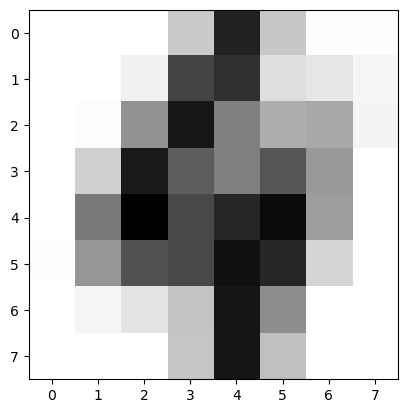

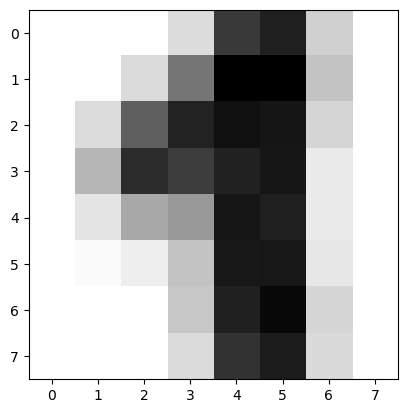

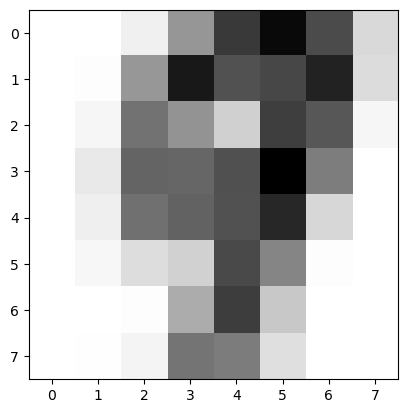

In [168]:
for ii in range(10):
    plt.imshow(dataset[membership==ii,:].mean(0).reshape(8,8), interpolation = 'nearest', cmap = plt.cm.binary)
    plt.show()

Estimated number of clusters: 0
Estimated number of noise points: 1797


In [ ]:
Clustering:


https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python

In [ ]:
Linear regression:

https://data36.com/linear-regression-in-python-numpy-polyfit/

In [ ]:
libraries:

https://data36.com/python-libraries-packages-data-scientists/

In [ ]:
cronograma 6 semanas curso:
https://data36.com/the-junior-data-scientists-first-month-online-course/

In [ ]:
curso python:
https://data36.com/learn-python-for-data-science-from-scratch/

In [ ]:
Aquí ponen un ejemplo de cómo rentar una máquina:
https://data36.com/data-coding-101-install-python-sql-r-bash/

In [ ]:
random forest: https://data36.com/random-forest-in-python/

In [ ]:
https://gist.github.com/jenayl/71cc135175870dac46825ac89efeada7
https://stackabuse.com/dbscan-with-scikit-learn-in-python/
https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps
https://medium.com/datos-y-ciencia/aprendizaje-no-supervisado-en-machine-learning-agrupaci%C3%B3n-bb8f25813edc
https://machinelearningmastery.com/clustering-algorithms-with-python/
https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-clustering-methods
https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm
https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py